In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
warnings.filterwarnings('ignore')

In [2]:
comp = pd.read_csv('/Users/parvarora/Downloads/consumer_complaints.csv')
comp.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [3]:
comp['Product'].value_counts()

Product
Mortgage                   210324
Debt collection            124236
Credit reporting           119195
Credit card                 79007
Bank account or service     76084
Consumer Loan               26604
Student loan                21651
Payday loan                  4786
Money transfers              4720
Prepaid card                 3171
Other financial service       806
Virtual currency               14
Name: count, dtype: int64

In [4]:
comp['Sub-product'].value_counts()

Sub-product
Other mortgage                            81715
Conventional fixed mortgage               65036
Checking account                          53016
Other (i.e. phone, health club, etc.)     37170
I do not know                             26024
Credit card                               25127
Conventional adjustable mortgage (ARM)    23615
FHA mortgage                              22317
Non-federal student loan                  20698
Medical                                   17128
Vehicle loan                              15127
Other bank product/service                14636
Payday loan                               11469
Home equity loan or line of credit        10560
Installment loan                           7078
Savings account                            4711
VA mortgage                                4549
Mortgage                                   4298
Federal student loan servicing             3493
(CD) Certificate of deposit                3158
Auto                        

In [5]:
comp['Company'].value_counts()

Company
Bank of America                       61720
Wells Fargo & Company                 48902
Equifax                               41771
Experian                              39473
JPMorgan Chase & Co.                  38928
                                      ...  
Southern Funding Alliance USA, LLC        1
R.C. Temme Corporation                    1
DeGrasse & Rolnick                        1
Wetherington Hamilton, P.A.               1
Cross State Motors, LLC                   1
Name: count, Length: 3933, dtype: int64

In [6]:
comp.isna().sum()

Date received                        0
Product                              0
Sub-product                     198202
Issue                                0
Sub-issue                       400730
Consumer complaint narrative    555894
Company public response         525401
Company                              0
State                             5305
ZIP code                          5324
Tags                            575868
Consumer consent provided?      462447
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?               41419
Complaint ID                         0
dtype: int64

In [7]:
product_percentage = round(comp["Product"].value_counts() / len(comp["Product"]) * 100,2)

print(product_percentage)

labels = list(product_percentage.index)
values = product_percentage.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values,
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Product
Mortgage                   31.36
Debt collection            18.53
Credit reporting           17.77
Credit card                11.78
Bank account or service    11.35
Consumer Loan               3.97
Student loan                3.23
Payday loan                 0.71
Money transfers             0.70
Prepaid card                0.47
Other financial service     0.12
Virtual currency            0.00
Name: count, dtype: float64


In [8]:
comp1 = comp.loc[:,['Consumer complaint narrative', 'Product']]
comp1

,Consumer complaint narrative,Product
0,NaN,Consumer Loan
1,NaN,Bank account or service
2,NaN,Bank account or service
3,NaN,Bank account or service
4,NaN,Mortgage
...,...,...
670593,NaN,Credit reporting
670594,We purchased our home in XX/XX/XXXX at the pea...,Mortgage
670595,NaN,Credit reporting
670596,I have had an American Express card for over t...,Credit card


In [9]:
comp1 = comp1.dropna()
comp1

,Consumer complaint narrative,Product
57729,Received Capital One charge card offer XXXX. A...,Credit card
57787,I do n't know how they got my cell number. I t...,Debt collection
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card
57848,"After looking at my credit report, I saw a col...",Credit reporting
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection
...,...,...
670582,My mother XXXX in XXXX with a reverse mortgage...,Mortgage
670588,Chase rejects customer payments claiming that ...,Credit card
670590,I filed for chapter XXXX protection 5 years ag...,Credit card
670594,We purchased our home in XX/XX/XXXX at the pea...,Mortgage


In [10]:
comp1.isnull().sum()

Consumer complaint narrative    0
Product                         0
dtype: int64

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parvarora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/parvarora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/parvarora/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Clean the textual column
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [13]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: word_tokenize(x))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: word_lemmatizer(x))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: ' '.join(x))
    return df

In [14]:
comp1.rename(columns={'Consumer complaint narrative': 'complaints'}, inplace= True)
comp1.head()

,complaints,Product
57729,Received Capital One charge card offer XXXX. A...,Credit card
57787,I do n't know how they got my cell number. I t...,Debt collection
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card
57848,"After looking at my credit report, I saw a col...",Credit reporting
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection


In [15]:
comp1_clean = clean_text(comp1, 'complaints', 'complaints_clean')
comp1_clean

,complaints,Product,complaints_clean
57729,Received Capital One charge card offer XXXX. A...,Credit card,received capital one charge card offer xxxx ap...
57787,I do n't know how they got my cell number. I t...,Debt collection,nt know got cell number told would deal onlybw...
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,longtime member charter one bankrbs citizen ba...
57848,"After looking at my credit report, I saw a col...",Credit reporting,looking credit report saw collection account b...
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,received call xxxx xxxx xxxx xxxx ext xxxx sta...
...,...,...,...
670582,My mother XXXX in XXXX with a reverse mortgage...,Mortgage,mother xxxx xxxx reverse mortgage well fargo a...
670588,Chase rejects customer payments claiming that ...,Credit card,chase reject customer payment claiming made of...
670590,I filed for chapter XXXX protection 5 years ag...,Credit card,filed chapter xxxx protection year ago dischar...
670594,We purchased our home in XX/XX/XXXX at the pea...,Mortgage,purchased home xxxxxxxx peak real estate marke...


In [16]:
comp1_clean['Product'].value_counts()

Product
Debt collection            28861
Mortgage                   24641
Credit reporting           22202
Credit card                13582
Bank account or service    10425
Consumer Loan               6394
Student loan                4948
Payday loan                 1245
Prepaid card                1144
Money transfers             1074
Other financial service      176
Virtual currency              12
Name: count, dtype: int64

In [17]:
def x_rem(sent):
    sent = pd.DataFrame(re.sub(['x','xx','xxx','xxxx','xxxxx','xxxxxx','xxxxxx','xxxxxxxx','xxxxxxxxxxxx']," ", sent))
    return sent

In [18]:
def remove_stopwords(text,stopwords=['x','xx','xxx','xxxx','xxxxx','xxxxxx','xxxxxx','xxxxxxxx']):
    filtered_words = [word for word in text.split() if word.lower() not in stopwords]
    return" ".join(filtered_words)

In [19]:
comp1_clean['complaints_clean'] = comp1_clean['complaints_clean'].apply(remove_stopwords, stopwords)
comp1_clean

,complaints,Product,complaints_clean
57729,Received Capital One charge card offer XXXX. A...,Credit card,received capital one charge card offer applied...
57787,I do n't know how they got my cell number. I t...,Debt collection,nt know got cell number told would deal onlybw...
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,longtime member charter one bankrbs citizen ba...
57848,"After looking at my credit report, I saw a col...",Credit reporting,looking credit report saw collection account b...
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,received call ext stating owed wanted however ...
...,...,...,...
670582,My mother XXXX in XXXX with a reverse mortgage...,Mortgage,mother reverse mortgage well fargo assigned lo...
670588,Chase rejects customer payments claiming that ...,Credit card,chase reject customer payment claiming made of...
670590,I filed for chapter XXXX protection 5 years ag...,Credit card,filed chapter protection year ago dischargedpa...
670594,We purchased our home in XX/XX/XXXX at the pea...,Mortgage,purchased home peak real estate market area fi...


In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


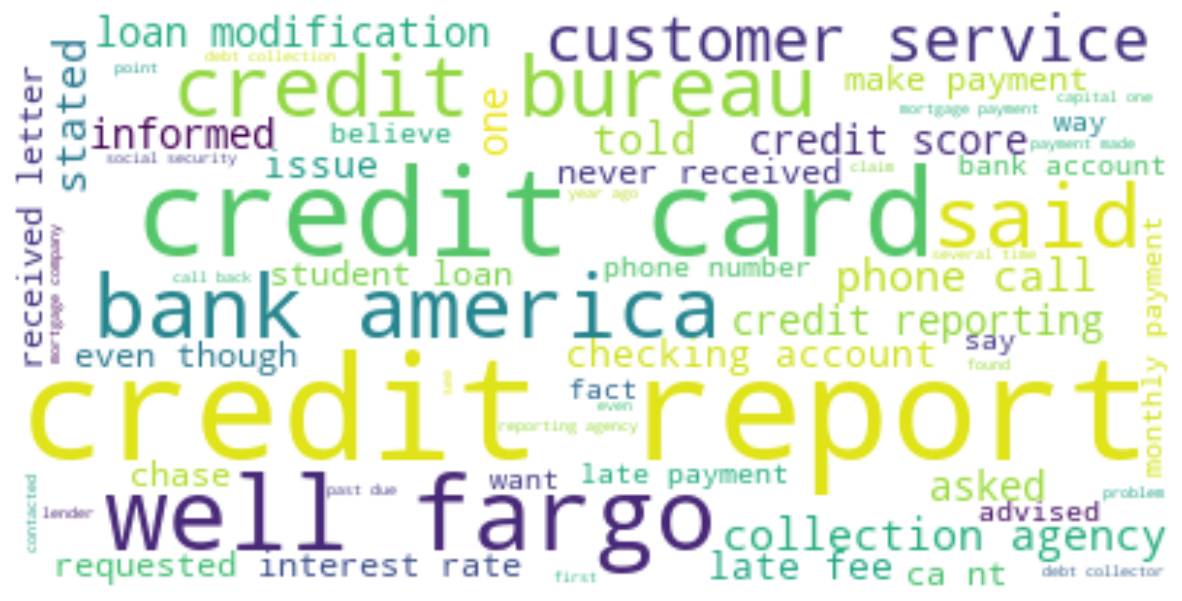

In [21]:
from collections import Counter

from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60, 
                      max_words=60, 
                      background_color="white", 
                      random_state=100).generate(str(Counter(comp1_clean['complaints_clean'])))
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

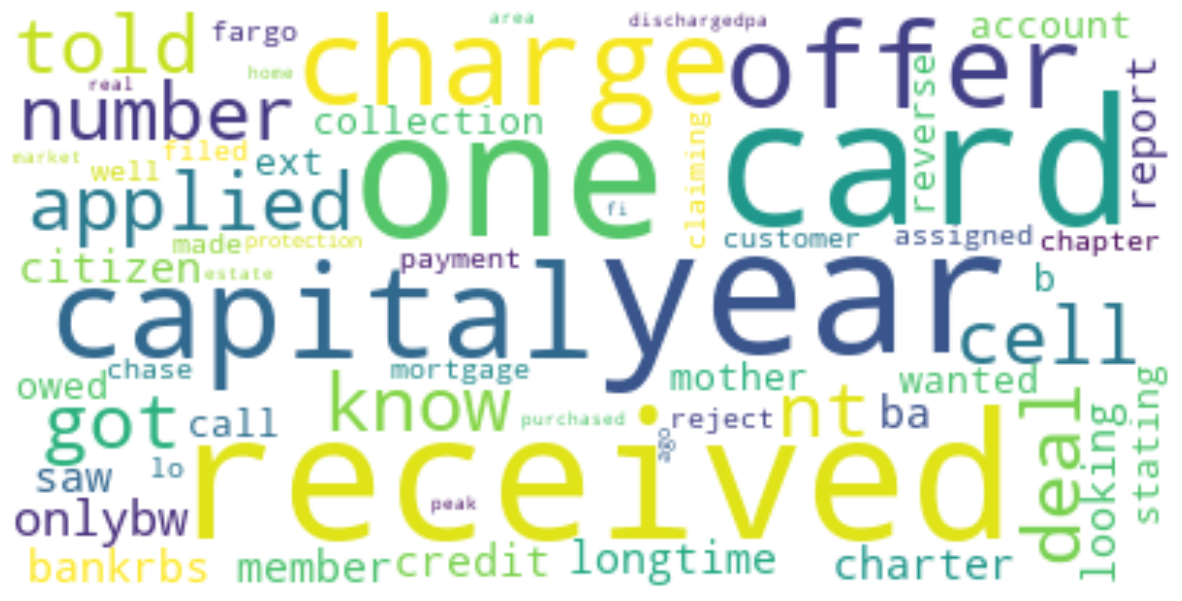

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60, 
                      max_words=60, 
                      background_color="white", 
                      random_state=100).generate(str(comp1_clean['complaints_clean']))
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating a function to extract top ngrams(unigram/bigram/trigram) based on the function inputs

def top_ngrams(text,n=None, n_grams=(1,1)):
    rev_model = CountVectorizer(ngram_range=n_grams).fit(text)
    rev_df = rev_model.fit_transform(text)
    
    sum_words = rev_df.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word,idx in rev_model.vocabulary_.items()]
    word_freq = sorted(word_freq, key= lambda x : x[1], reverse= True)
    return word_freq[:n]

In [24]:
n=30
unigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n)
unigram_top30_data = pd.DataFrame(unigram_top30, columns = ['unigram', 'count'])
unigram_top30_data

,unigram,count
0,account,153899
1,credit,149777
2,payment,120236
3,loan,98188
4,would,83428
5,bank,75788
6,time,71617
7,report,67162
8,debt,64750
9,told,63310


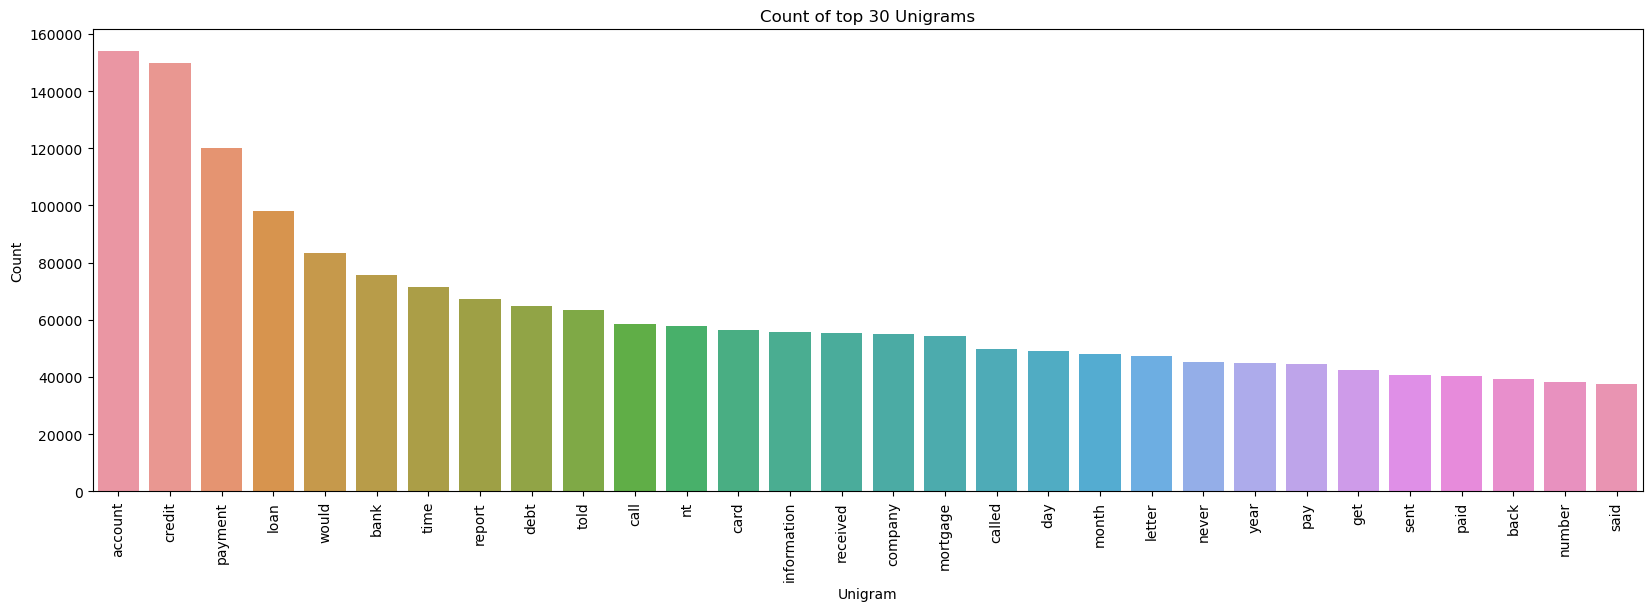

In [25]:
plt.figure(figsize=[20,6])
sns.barplot(x=unigram_top30_data['unigram'], y=unigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [26]:
n=30
n_grams = (2,2)

bigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n, n_grams=n_grams)
bigram_top30_data = pd.DataFrame(bigram_top30, columns = ['unigram', 'count'])
bigram_top30_data

,unigram,count
0,credit report,39774
1,credit card,24446
2,well fargo,16119
3,bank america,11755
4,credit bureau,11151
5,customer service,10091
6,collection agency,9822
7,phone call,8875
8,credit reporting,8163
9,credit score,8054


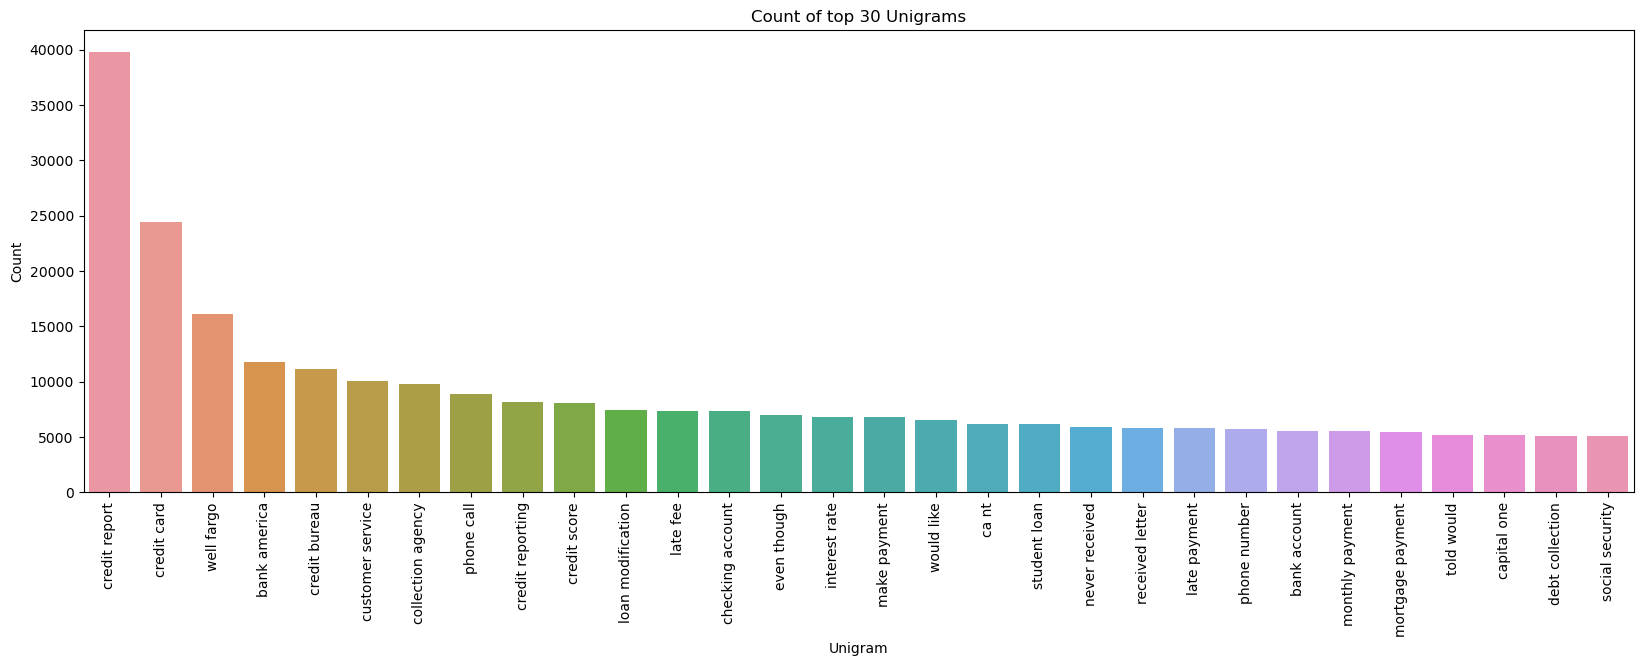

In [27]:
plt.figure(figsize=[20,6])
sns.barplot(x=bigram_top30_data['unigram'], y=bigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [28]:
n=30
n_grams = (3,3)

trigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n, n_grams=n_grams)
trigram_top30_data = pd.DataFrame(trigram_top30, columns = ['unigram', 'count'])
trigram_top30_data

,unigram,count
0,credit reporting agency,3709
1,social security number,2695
2,fair credit reporting,2234
3,credit reporting act,2183
4,credit card account,2000
5,removed credit report,1970
6,credit card company,1895
7,debt collection practice,1734
8,information credit report,1720
9,account credit report,1713


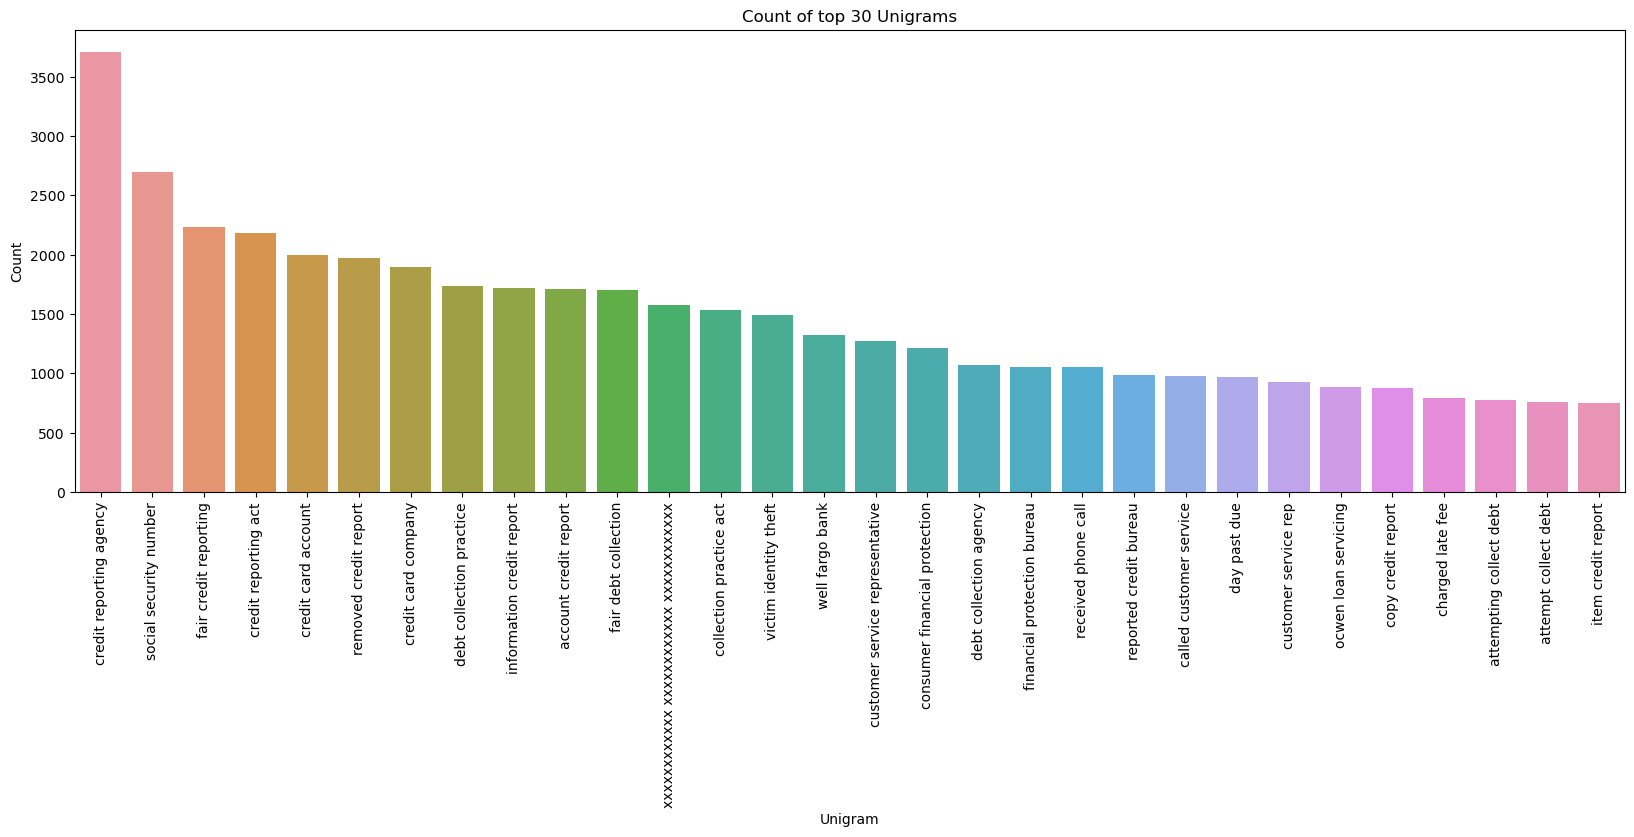

In [29]:
plt.figure(figsize=[20,6])
sns.barplot(x=trigram_top30_data['unigram'], y=trigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(min_df = 2, max_df = 0.95)

tfidf_df = tfidf_model.fit_transform(comp1_clean['complaints_clean'])
tfidf_df

<114704x31667 sparse matrix of type '<class 'numpy.float64'>'
	with 6563381 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5,
                                      learning_method='online',
                                      max_iter=20,
                                      random_state=42)

In [32]:
X_topics = lda_model.fit_transform(tfidf_df)

In [33]:
n_top_words = 15
topic_summaries = []

topic_word = lda_model.components_  # get the topic words

In [34]:
vocab = tfidf_model.get_feature_names_out()

In [35]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: loan | payment | mortgage | home | would | month | modification | time | year | bank | pay | told | nt | interest | get
Topic 1: account | card | bank | credit | payment | fee | charge | would | check | money | told | nt | day | balance | called
Topic 2: call | debt | phone | number | calling | called | company | work | stop | told | collection | time | asked | nt | message
Topic 3: citimortgage | sallie | mae | sears | morgan | jp | gm | chexsystems | capitalone | signer | cbe | eos | dental | bond | dentist
Topic 4: credit | report | account | debt | collection | reporting | information | equifax | agency | removed | experian | company | dispute | letter | bureau


In [36]:
no_topics = 5
words = np.array(vocab)
topic_words = pd.DataFrame(np.zeros((no_topics, 15)), index=[f'Topic {i + 1}' for i in range(no_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(no_topics):
    ix = topic_word[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,loan,payment,mortgage,home,would,month,modification,time,year,bank,pay,told,nt,interest,get
Topic 2,account,card,bank,credit,payment,fee,charge,would,check,money,told,nt,day,balance,called
Topic 3,call,debt,phone,number,calling,called,company,work,stop,told,collection,time,asked,nt,message
Topic 4,citimortgage,sallie,mae,sears,morgan,jp,gm,chexsystems,capitalone,signer,cbe,eos,dental,bond,dentist
Topic 5,credit,report,account,debt,collection,reporting,information,equifax,agency,removed,experian,company,dispute,letter,bureau


In [37]:
topic_results = lda_model.transform(tfidf_df)

#assigning best results to the topics 
comp1_clean['Topic'] = topic_results.argmax(axis=1)
comp1_clean

,complaints,Product,complaints_clean,Topic
57729,Received Capital One charge card offer XXXX. A...,Credit card,received capital one charge card offer applied...,1
57787,I do n't know how they got my cell number. I t...,Debt collection,nt know got cell number told would deal onlybw...,2
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,longtime member charter one bankrbs citizen ba...,1
57848,"After looking at my credit report, I saw a col...",Credit reporting,looking credit report saw collection account b...,4
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,received call ext stating owed wanted however ...,2
...,...,...,...,...
670582,My mother XXXX in XXXX with a reverse mortgage...,Mortgage,mother reverse mortgage well fargo assigned lo...,0
670588,Chase rejects customer payments claiming that ...,Credit card,chase reject customer payment claiming made of...,1
670590,I filed for chapter XXXX protection 5 years ag...,Credit card,filed chapter protection year ago dischargedpa...,4
670594,We purchased our home in XX/XX/XXXX at the pea...,Mortgage,purchased home peak real estate market area fi...,0


In [38]:
comp1_clean['Topic'].value_counts()

Topic
0    37629
4    33661
1    33581
2     9746
3       87
Name: count, dtype: int64

In [39]:
comp1_clean_sort=comp1_clean.groupby('Topic').head(5)
comp1_clean_sort.sort_values('Topic')

,complaints,Product,complaints_clean,Topic
57884,I am assisted with my mortgage through an agen...,Mortgage,assisted mortgage agency since help pay mortga...,0
57946,I filed ChapterXXXX bankruptcy on my accounts ...,Debt collection,filed chapterxxxx bankruptcy account proud bad...,0
57882,"Going through a divorce, my ex and I were unab...",Debt collection,going divorce ex unable pay mortgage month hou...,0
57874,This is a continuation of a previous issue wit...,Student loan,continuation previous issue citibank reached a...,0
57868,I had my purse stolen in 2007. They never foun...,Credit reporting,purse stolen never found person responsible ca...,0
57912,XXXX Card services was bought out by Capital O...,Credit card,card service bought capital one never notified...,1
57893,i submitted a payment on XXXX XXXX 2015 for my...,Mortgage,submitted payment son mortgage payment every m...,1
57871,I attempted to apply for a Discover Card Onlin...,Credit card,attempted apply discover card online system ha...,1
57729,Received Capital One charge card offer XXXX. A...,Credit card,received capital one charge card offer applied...,1
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,longtime member charter one bankrbs citizen ba...,1


In [40]:
Topic_names = { 0:"Loan Department", 1:"Theft/dispute reporting", 2: "Bank Account Service",
               3:"Other", 4:" Customer Service" }
#Replace Topics with Topic Names
comp1_clean['Topic'] = comp1_clean['Topic'].map(Topic_names)
comp1_clean

,complaints,Product,complaints_clean,Topic
57729,Received Capital One charge card offer XXXX. A...,Credit card,received capital one charge card offer applied...,Theft/dispute reporting
57787,I do n't know how they got my cell number. I t...,Debt collection,nt know got cell number told would deal onlybw...,Bank Account Service
57838,I 'm a longtime member of Charter One Bank/RBS...,Credit card,longtime member charter one bankrbs citizen ba...,Theft/dispute reporting
57848,"After looking at my credit report, I saw a col...",Credit reporting,looking credit report saw collection account b...,Customer Service
57852,I received a call from a XXXX XXXX from XXXX @...,Debt collection,received call ext stating owed wanted however ...,Bank Account Service
...,...,...,...,...
670582,My mother XXXX in XXXX with a reverse mortgage...,Mortgage,mother reverse mortgage well fargo assigned lo...,Loan Department
670588,Chase rejects customer payments claiming that ...,Credit card,chase reject customer payment claiming made of...,Theft/dispute reporting
670590,I filed for chapter XXXX protection 5 years ag...,Credit card,filed chapter protection year ago dischargedpa...,Customer Service
670594,We purchased our home in XX/XX/XXXX at the pea...,Mortgage,purchased home peak real estate market area fi...,Loan Department


In [41]:
comp1_clean['Product'].value_counts()

Product
Debt collection            28861
Mortgage                   24641
Credit reporting           22202
Credit card                13582
Bank account or service    10425
Consumer Loan               6394
Student loan                4948
Payday loan                 1245
Prepaid card                1144
Money transfers             1074
Other financial service      176
Virtual currency              12
Name: count, dtype: int64

In [42]:
comp1_clean['Topic'].value_counts()

Topic
Loan Department            37629
 Customer Service          33661
Theft/dispute reporting    33581
Bank Account Service        9746
Other                         87
Name: count, dtype: int64

In [43]:
data = comp1_clean[['complaints', 'Topic']]
data 

,complaints,Topic
57729,Received Capital One charge card offer XXXX. A...,Theft/dispute reporting
57787,I do n't know how they got my cell number. I t...,Bank Account Service
57838,I 'm a longtime member of Charter One Bank/RBS...,Theft/dispute reporting
57848,"After looking at my credit report, I saw a col...",Customer Service
57852,I received a call from a XXXX XXXX from XXXX @...,Bank Account Service
...,...,...
670582,My mother XXXX in XXXX with a reverse mortgage...,Loan Department
670588,Chase rejects customer payments claiming that ...,Theft/dispute reporting
670590,I filed for chapter XXXX protection 5 years ag...,Customer Service
670594,We purchased our home in XX/XX/XXXX at the pea...,Loan Department


In [44]:
Topic_names1 = { "Loan Department": 0, "Theft/dispute reporting": 1, "Bank Account Service": 2,
               "Other" : 3, " Customer Service": 4 }
#Replace Topics with Topic Names
data['Topic'] = data['Topic'].map(Topic_names1)
data

,complaints,Topic
57729,Received Capital One charge card offer XXXX. A...,1
57787,I do n't know how they got my cell number. I t...,2
57838,I 'm a longtime member of Charter One Bank/RBS...,1
57848,"After looking at my credit report, I saw a col...",4
57852,I received a call from a XXXX XXXX from XXXX @...,2
...,...,...
670582,My mother XXXX in XXXX with a reverse mortgage...,0
670588,Chase rejects customer payments claiming that ...,1
670590,I filed for chapter XXXX protection 5 years ag...,4
670594,We purchased our home in XX/XX/XXXX at the pea...,0


In [45]:
count_model1 = CountVectorizer()
data_cv = count_model1.fit_transform(data['complaints'])

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trasformer = TfidfTransformer()
data_tfidf = tfidf_trasformer.fit_transform(data_cv)

tfidf_model1 = TfidfVectorizer()
tfidf_vect = tfidf_model1.fit_transform(data['complaints'])

In [47]:
x= tfidf_vect
y= data['Topic']


print(y.head())

57729    1
57787    2
57838    1
57848    4
57852    2
Name: Topic, dtype: int64


In [48]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [49]:
ytrain.value_counts()

Topic
0    26241
4    23634
1    23504
2     6861
3       52
Name: count, dtype: int64

In [50]:
ytest.value_counts()

Topic
0    11388
1    10077
4    10027
2     2885
3       35
Name: count, dtype: int64

## Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

modellg = LogisticRegression(max_iter=1000)

# Train the model
modellg.fit(xtrain, ytrain)

# Make predictions
ypred = modellg.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy}')

# Create a confusion matrix
cm = confusion_matrix(ytest, ypred)

print(ypred)

Accuracy: 0.9183133790538185
[4 0 4 ... 2 4 4]


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=3, max_features='sqrt')

# Train the classifier
DT.fit(xtrain, ytrain)

# Make predictions
ypred = DT.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)

print(ypred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


[0 0 0 ... 0 4 0]
Accuracy: 0.3645530628850401
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.98      0.51     11388
           1       0.72      0.02      0.03     10077
           2       0.00      0.00      0.00      2885
           3       0.00      0.00      0.00        35
           4       0.83      0.12      0.20     10027

    accuracy                           0.36     34412
   macro avg       0.38      0.22      0.15     34412
weighted avg       0.57      0.36      0.24     34412



## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=2, max_depth=5, max_features='sqrt')

# Train the classifier
rf.fit(xtrain, ytrain)

# Make predictions
ypred = rf.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)

print(ypred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


[4 0 4 ... 4 4 4]
Accuracy: 0.6695920027897245
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73     11388
           1       0.95      0.41      0.58     10077
           2       0.00      0.00      0.00      2885
           3       0.00      0.00      0.00        35
           4       0.64      0.88      0.74     10027

    accuracy                           0.67     34412
   macro avg       0.44      0.44      0.41     34412
weighted avg       0.67      0.67      0.63     34412



In [54]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Neural Network

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Convert the target variable to categorical format
y_categorical = to_categorical(data['Topic'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(tfidf_vect, y_categorical, test_size=0.3, random_state=42)

# Determine the number of samples and features
n_samples = x_train.shape[0]
n_features = x_train.shape[1]

# Create the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  # Number of topics

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
batch_size = 64
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(y_pred)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
y_pred = model.predict(x_test)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     8,490,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,499,205 (32.42 MB)

 Trainable params: 8,499,205 (32.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.8321 - loss: 0.4990 - val_accuracy: 0.9296 - val_loss: 0.1879
Epoch 2/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9616 - loss: 0.1086 - val_accuracy: 0.9312 - val_loss: 0.1846
Epoch 3/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9828 - loss: 0.0519 - val_accuracy: 0.9286 - val_loss: 0.2170
Epoch 4/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9264 - val_loss: 0.2596
Epoch 5/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.9951 - loss: 0.0164 - val_accuracy: 0.9283 - val_loss: 0.2827
Epoch 6/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.9280 - val_loss: 0.3227
Epoch 7/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.9975 - loss: 0.0090 - val_accuracy: 0.9268 - val_loss: 0.3506
Epoch 8/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.9977 -